In [1]:
import pandas as pd
import matplotlib.pyplot as py
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(
          host = 'localhost'
        , username = 'root'
        , password = 'Root'
        , database = 'ecommerce'
    )

cur = db.cursor()
    

# Identify the correlation between product price and the number of times a product has been purchased.

In [11]:
import numpy as np
query = """
        SELECT products.product_category, count(order_items.product_id), round(AVG(order_items.price),2) from ecommerce.products
            JOIN ecommerce.order_items ON order_items.product_id = products.product_id
        GROUP BY products.product_category
"""
cur.execute(query)
data = cur.fetchall()
#data
df = pd.DataFrame(data, columns = ["Product_Category", "Order_Count","Avg Product Price"])
#df
#correlation
arr1 = df["Order_Count"]
arr2 = df["Avg Product Price"]
a = np.corrcoef([arr1,arr2]) #1:13 min
#Got 0.10631514 - means, no impact of orders on the product
# In this way, we cannot say that if the price is increasing, then we will reduce the order. 
# If orders increase then our price go down. 
#there is a neutral relation b/w Order_Count & price. There is no impact on Order_ount based on price.
# When relation exsists b/w -1 to +1 where -1 measn inversely proportional value & +1 is proportional value.

print("The correlation b/w price and the number of times a product has been purchased is:",a[0][-1])

The correlation b/w price and the number of times a product has been purchased is: -0.10631514167157567


# Calculate the total revenue generated by each seller, and rank them by revenue.

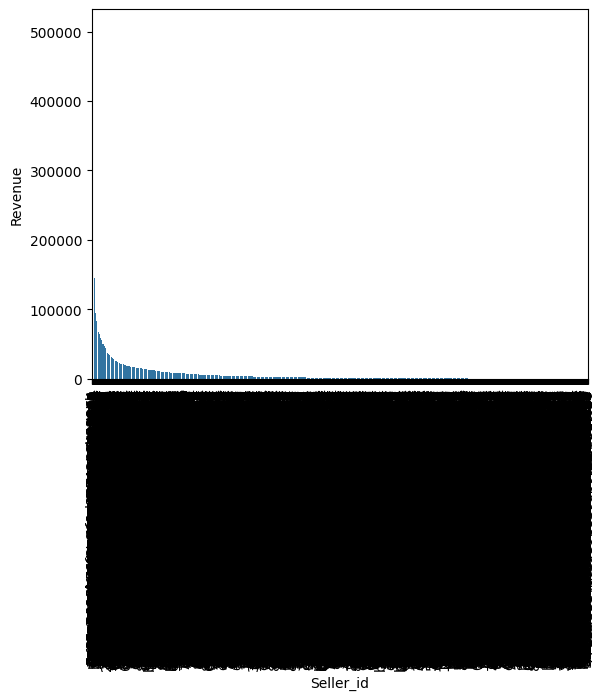

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
query = """
        SELECT *, dense_rank() over(order by revenue DESC) rnk FROM
        (SELECT order_items.seller_id, SUm(payments.payment_value) revenue from ecommerce.order_items
            JOIN ecommerce.payments ON payments.order_id = order_items.order_id
        GROUP BY order_items.seller_id) a
        """
cur.execute(query)
data = cur.fetchall()
#data
df = pd.DataFrame(data, columns = ["Seller_id", "Revenue", "Rank"])
df.head()
sns.barplot(x = "Seller_id", y = "Revenue", data = df)
plt.xticks(rotation = 90)
plt.show()

In [1]:
#Advanced Queries
#1. Calculate the moving average of order values for each customer over their order history.
#2. Calculate the cumulative sales per month for each year.
#3. Calculate the year-over-year growth rate of total sales.
#4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.
#5. Identify the top 3 customers who spent the most money in each year.

# 1. Calculate the moving average of order values for each customer over their order history.